In [8]:
import sys
sys.path.append('../')
from src.compress_sensing_library import *
import pandas as pd

In [35]:
hyperparam_track = data_save_path('tree_part1', 'dct', 'V1', 'test')
hyperparam_track = hyperparam_track.split('.')[0] + '.txt'
rep = 10
alp = [1, 2, 3, 4, 5, 6]
num_cell = [50, 100, 200]
cell_size = [1, 2, 4, 6, 8]
sparse_freq = [1, 2, 4, 6, 8]
search_list = [rep, alp, num_cell, cell_size, sparse_freq]

hyperparam_list = list(zip(search_df.columns, search_list))

f = open(hyperparam_track, "a+")
f.write("nameofFile\n")
for i in hyperparam_list:
    f.write(f"   {i[0]}: {i[1]}\n")
f.write("\n\n")
f.close()

upper triggered: V1


In [15]:
search_df = pd.DataFrame(columns= [ 'rep', 'alp', 'num_cell', 'cell_size', 'sparse_freq'])
search_df.columns[1:]

Index(['alp', 'num_cell', 'cell_size', 'sparse_freq'], dtype='object')

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

import sys
sys.path.append("../")

# Package for importing image representation
from PIL import Image, ImageOps

# from src.V1_reconst import generate_Y, reconstruct
import pandas as pd
import seaborn as sns
import time
import os.path
from src.compress_sensing_library import *

In [2]:
img_nm = 'tree_part1'
root = search_root()
load_V1 = '{root}/result/dct/{img}/V1/color_param_Fri_Jun_30_19_07_29_2023.csv'.format(root = root, img = img_nm)
load_pixel = '{root}/result/dct/{img}/pixel/color_param_Fri_May_12_16_46_28_2023.csv'.format(root = root, img = img_nm)
load_gaussian = '{root}/result/dct/{img}/gaussian/color_param_Fri_May_12_16_46_08_2023.csv'.format(root = root, img = img_nm)
directory = "num_cell_error"
save = True
data = [load_pixel, load_gaussian, load_V1]

In [3]:
V1_param_df = pd.read_csv(load_V1)

for index in V1_param_df.columns:
    if (index == 'Unnamed: 0') :
        V1_param_df.drop('Unnamed: 0', axis = 1, inplace=True)

In [4]:
V1_param_df

,rep,alp,num_cell,cell_size,sparse_freq,error
0,0.0,0.1,50,2.0,2.0,153.865056
1,0.0,0.1,50,2.0,4.0,178.838409
2,0.0,0.1,50,4.0,2.0,174.455184
3,0.0,0.1,50,4.0,4.0,208.919030
4,0.0,0.1,200,2.0,2.0,56.573767
...,...,...,...,...,...,...
475,19.0,10.0,50,4.0,4.0,46.420410
476,19.0,10.0,200,2.0,2.0,37.221454
477,19.0,10.0,200,2.0,4.0,37.480825
478,19.0,10.0,200,4.0,2.0,36.091319


In [5]:
V1_param_df.loc[V1_param_df['num_cell'] == 50]

,rep,alp,num_cell,cell_size,sparse_freq,error
0,0.0,0.1,50,2.0,2.0,153.865056
1,0.0,0.1,50,2.0,4.0,178.838409
2,0.0,0.1,50,4.0,2.0,174.455184
3,0.0,0.1,50,4.0,4.0,208.919030
8,0.0,1.0,50,2.0,2.0,76.695741
...,...,...,...,...,...,...
467,19.0,1.0,50,4.0,4.0,62.384275
472,19.0,10.0,50,2.0,2.0,66.465697
473,19.0,10.0,50,2.0,4.0,50.336060
474,19.0,10.0,50,4.0,2.0,52.852478


In [6]:
V1_param_df.loc[(V1_param_df['num_cell'] == 50) & (V1_param_df['alp'] == 0.01) & (V1_param_df['cell_size'] == 8) & (V1_param_df['sparse_freq'] == 4)]

,rep,alp,num_cell,cell_size,sparse_freq,error


In [7]:
temp = V1_param_df.loc[(V1_param_df['num_cell'] == 50) & (V1_param_df['alp'] == 0.01) & (V1_param_df['cell_size'] == 8) & (V1_param_df['sparse_freq'] == 4)]

temp2 = V1_param_df.groupby(
    ['num_cell', 'sparse_freq', 'cell_size', 'alp'], as_index=False).mean().drop('rep', axis=1) 
temp2#.loc[(temp2['num_cell'] == 50) & (temp2['alp'] == 0.1) & (temp2['cell_size'] == 8) & (temp2['sparse_freq'] == 4)]

,num_cell,sparse_freq,cell_size,alp,error
0,50,2.0,2.0,0.1,152.755678
1,50,2.0,2.0,1.0,78.811332
2,50,2.0,2.0,10.0,58.361234
3,50,2.0,4.0,0.1,166.797645
4,50,2.0,4.0,1.0,71.303997
5,50,2.0,4.0,10.0,54.842595
6,50,4.0,2.0,0.1,177.803339
7,50,4.0,2.0,1.0,88.633976
8,50,4.0,2.0,10.0,53.774387
9,50,4.0,4.0,0.1,189.215586


In [8]:
temp3.groupby(
    ['num_cell', 'sparse_freq', 'cell_size', 'alp'], as_index=False).mean().drop('rep', axis=1)

NameError: name 'temp3' is not defined

In [9]:
temp3 = V1_param_df.loc[V1_param_df['num_cell'] == 200]

# temp3.loc[(temp3['error'] == temp3['error'].min())]
temp50 = temp3.groupby(
    ['num_cell', 'sparse_freq', 'cell_size', 'alp'], as_index=False).mean().drop('rep', axis=1)
num_cell, cell_size, sparse_freq, alpha, error = temp50.loc[(temp50['error'] == temp50['error'].min())].values.squeeze()
num_cell = int(num_cell)
cell_size = int(cell_size)
sparse_freq = int(sparse_freq)

In [10]:
temp50.loc[(temp50['error'] == temp50['error'].min())]

,num_cell,sparse_freq,cell_size,alp,error
4,200,2.0,4.0,1.0,34.397261


In [11]:
V1_param_df.loc[(V1_param_df['num_cell'] == 200) & (V1_param_df['sparse_freq'] == 2) & (V1_param_df['cell_size'] == 4) & (V1_param_df['alp'] == 1)]

,rep,alp,num_cell,cell_size,sparse_freq,error
14,0.0,1.0,200,4.0,2.0,34.210525
38,1.0,1.0,200,4.0,2.0,34.470648
62,2.0,1.0,200,4.0,2.0,35.531973
86,3.0,1.0,200,4.0,2.0,34.575666
110,4.0,1.0,200,4.0,2.0,33.693867
134,5.0,1.0,200,4.0,2.0,34.034215
158,6.0,1.0,200,4.0,2.0,34.173040
182,7.0,1.0,200,4.0,2.0,34.056538
206,8.0,1.0,200,4.0,2.0,33.996503
230,9.0,1.0,200,4.0,2.0,33.878197


In [12]:
root = search_root()
img = Image.open(os.path.join(root, "image/tree_part1.jpg"))
img_arr = np.asarray(img)


In [13]:
img_arr.shape

(30, 30, 3)

Process Reconstruction on (30, 30, 3) image


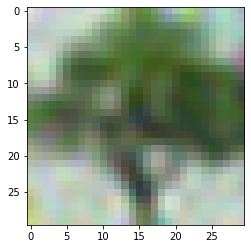

36.015876128914776
Process Reconstruction on (30, 30, 3) image


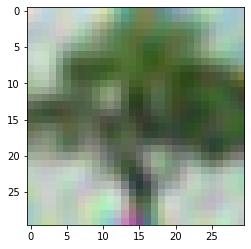

36.499421608811524
Process Reconstruction on (30, 30, 3) image


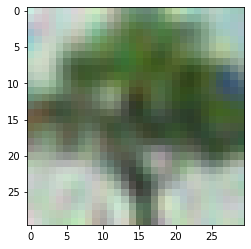

35.74836437594811
Process Reconstruction on (30, 30, 3) image


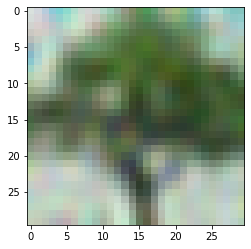

36.14194239384485
Process Reconstruction on (30, 30, 3) image


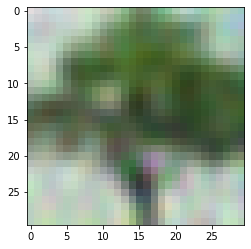

35.542759850323634
Process Reconstruction on (30, 30, 3) image


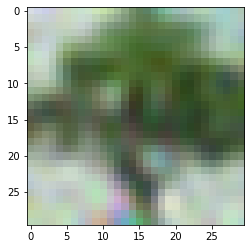

36.55622761962424
Process Reconstruction on (30, 30, 3) image


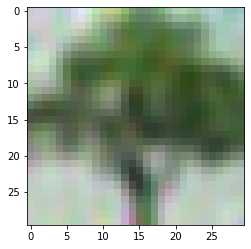

35.316473965181366
Process Reconstruction on (30, 30, 3) image


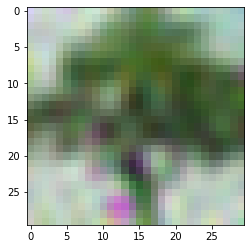

36.92370512286111
Process Reconstruction on (30, 30, 3) image


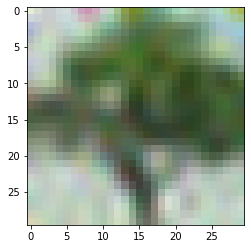

35.8548772445566
Process Reconstruction on (30, 30, 3) image


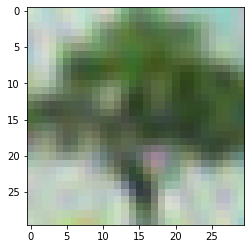

35.58322014033518


In [14]:
for i in range(0, 10) :
    reconst = filter_reconstruct(img_arr, num_cell = num_cell, cell_size = cell_size, sparse_freq = sparse_freq, alpha = alpha, observation = 'V1', mode = 'color')
    plt.imshow(reconst)
    plt.show()
    print(error_calculation(img_arr, reconst))

In [13]:
error

34.11475348208387

In [136]:
V1_param_df.loc[(V1_param_df['num_cell'] == num_cell) & (V1_param_df['cell_size'] == cell_size) & (V1_param_df['sparse_freq'] == sparse_freq) & (V1_param_df['alp'] == alpha)].groupby(['alp', 'num_cell', 'cell_size', 'sparse_freq']).mean()

,,,,rep,error
alp,num_cell,cell_size,sparse_freq,,
1.0,200,2,6,9.5,37.231709


In [148]:
temp50.loc[(V1_param_df['num_cell'] == num_cell) & (V1_param_df['cell_size'] == cell_size) & (V1_param_df['sparse_freq'] == sparse_freq) & (V1_param_df['alp'] == alpha)]

,num_cell,sparse_freq,cell_size,alp,error


In [149]:
temp50

,num_cell,sparse_freq,cell_size,alp,error
0,200,1,1,0.001,125.711718
1,200,1,1,0.010,120.815517
2,200,1,1,0.100,77.745605
3,200,1,1,1.000,46.563879
4,200,1,1,10.000,45.394015
...,...,...,...,...,...
170,200,8,8,0.100,38.769369
171,200,8,8,1.000,42.595263
172,200,8,8,10.000,46.416362
173,200,8,8,100.000,49.882553
